In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.tsa.api as sm

%matplotlib inline
url = 'https://ds.codeup.com/saas.csv'

In [2]:
df = pd.read_csv(url)

In [3]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [4]:
df['Month_Invoiced'] = df['Month_Invoiced'].astype('datetime64')
df.index = df.Month_Invoiced

In [5]:
monthly = df[['Amount']].resample('M').sum()

In [6]:
monthly = monthly['2016':]

### Split

In [7]:
# Making masks for splitting
tr = monthly.index.year == 2016
val = (monthly.index.year == 2017) & (monthly.index.month < 7)
te = (monthly.index.year == 2017) & (monthly.index.month >= 7)

In [8]:
# Splits based om masks
train = monthly[tr]
validate = monthly[val]
test = monthly[te]

# quality check
len(train) + len(validate) + len(test) == len(monthly)

True

### Models

In [9]:
# simple average
validate['simp_avg'] = train.Amount.mean()

In [10]:
# rolling average
validate['rolling_3_month'] = train.Amount.rolling(3).mean()[-1]

In [11]:
# Holts
model = sm.Holt(train['Amount'], exponential = False) # make thing

model = model.fit(smoothing_level = .1, smoothing_slope = .1, optimized = False) # fit thing

validate['Holt1'] = model.predict(start = validate.index[0], 
                                       end = validate.index[-1]) # thing predicts

In [12]:
# 9 month diff
diff_9_month = train.Amount.diff(9).mean()
validate['diff_9_month'] = list(train[6:].Amount)
validate['diff_9_month'] = validate['diff_9_month'] + diff_9_month

<AxesSubplot:xlabel='Month_Invoiced'>

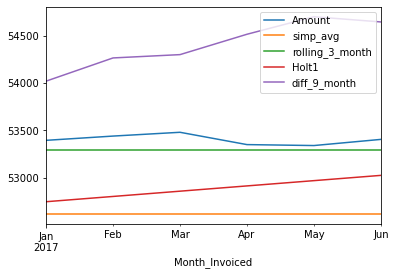

In [13]:
validate.plot()